## 4.10: Coding Etiquette & Excel Reporting

# INSTACART GROCERY BASKET ANALYSIS


##### Daniel Rodelli

________________

### _Notebook Summary_

 - 1. Datasest importing and dataframe checks
 - 2. Adressing PII Data
 - 3. Regional Segmentation
 - 4. Low-activity customers exclusion
 - 5. Customer Profiling
     - 5.1 Age
     - 5.2 Income
     - 5.3 Family Status
     - 5.4 Prices
     - 5.5 Spending 
     - 5.6 Gender
 - 6. Customer Profiling Visualizations
 - 7. Aggregating users by Spending and Frequency
 - 8. Customer Profiling and Regions

___________________________________

In [1]:
#importing the libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
#setting the path for importing the data
path = r'C:\Users\daniel\Documents\CareerFoundry\immersion_achievement4'

In [3]:
#importing the orders data set
df = pd.read_pickle(os.path.join(path, '02data', 'prepared_data', 'prods_orders_customers.pkl'))

In [4]:
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First_name,Surname,Gender,State,Age,Date_joined,n_dependants,Family_status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32436241 entries, 0 to 32436240
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               category
 9   product_name            object  
 10  aisle_id                float16 
 11  department_id           float16 
 12  prices                  float16 
 13  busiest_day             category
 14  Busiest days            category
 15  busiest_period_of_day   category
 16  max_order               int8    
 17  loyalty_flag            category
 18  mean_prices_customers   float16 
 19  spending_flag           category
 20  days_frequency          int8    
 21  freque

In [5]:
#check for eventual NaN values still present
df.isna().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2078207
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                30200
aisle_id                     2029
department_id                2029
prices                       2029
busiest_day                     0
Busiest days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
mean_prices_customers           0
spending_flag                   0
days_frequency                  0
frequency_flag                  0
First_name                      0
Surname                         0
Gender                          0
State                           0
Age                             0
Date_joined                     0
n_dependants                    0
Family_status 

In [6]:
df.dropna(subset = ['department_id'], inplace = True)

In [8]:
df.isna().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2078084
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                28171
aisle_id                        0
department_id                   0
prices                          0
busiest_day                     0
Busiest days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
mean_prices_customers           0
spending_flag                   0
days_frequency                  0
frequency_flag                  0
First_name                      0
Surname                         0
Gender                          0
State                           0
Age                             0
Date_joined                     0
n_dependants                    0
Family_status 

In [11]:
df.dropna(subset = ['product_name'], inplace = True)

Nhe NaN values in 'days_since_prior_order' most probably represent the fact that this is the very first order of a new client. I will leave as it is

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

First and last names are personal identificable information. It would violate data privacy regulamentations to release this kind of information in a report

In [12]:
#drop the First_name and Surname columns
df.drop(columns = ['First_name','Surname'], inplace = True)

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions)

In [36]:
region =[]

for state in df['State']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        region.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        region.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    else:
        region.append('West')



In [37]:
df['Region'] = region

In [16]:
#check that the new colum has been correctly added
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,days_frequency,frequency_flag,Gender,State,Age,Date_joined,n_dependants,Family_status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [17]:
df['Region'].value_counts()

South        10155251
West          8930266
Midwest       7597585
Northeast     5722939
Name: Region, dtype: int64

In [38]:
#cast as category
df['Region'] = df['Region'].astype('category')

#### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [19]:
#Crossing 'Region' with 'spending_flag' to check for spending habit differences
crosstab_region_spend = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)
crosstab_region_spend

spending_flag,High spender,Low spender
Region,,
Midwest,140254,7457331
Northeast,98843,5624096
South,174471,9980780
West,163953,8766313


In [16]:
crosstab_region_spend.to_clipboard()

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [44]:
#create a new dataframe excluding customers with less than 5 orders

df_clean = df[df['max_order'] >=5]

In [21]:
df_clean.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,days_frequency,frequency_flag,Gender,State,Age,Date_joined,n_dependants,Family_status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20,Frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [22]:
#check that no customers with less than 5 orders are present in the clean dataframe
df_clean['max_order'].value_counts().sort_index()

5      793176
6      811426
7      803996
8      811895
9      810201
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171363
Name: max_order, Length: 95, dtype: int64

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

##### 5.1 Age

In [23]:
df_clean['Age'].value_counts().sort_index()

18    478471
19    496096
20    480206
21    489131
22    490852
       ...  
77    478001
78    471133
79    508353
80    492765
81    485872
Name: Age, Length: 64, dtype: int64

Creating 10 year interval groups for the age will lead to easier to read charts

In [63]:
#create 10 years inteval age groups:
age_group = []

for i in df_clean['Age']:
    if i < 20:
        age_group.append('20 or less')     
    elif (i >=20) and (i < 30):
        age_group.append('20-30')     
    elif (i >= 30) and (i < 40):
        age_group.append('30-40')
    elif (i >= 40) and (i < 50):
        age_group.append('40-50')
    elif (i >= 50) and (i < 60):
        age_group.append('50-60')    
    elif (i >= 60) and (i < 70):
        age_group.append('60-70')
    else:
        age_group.append('over 70')

#append the new column to the dataframe
df_clean['age_group'] = age_group
        
        

<ipython-input-63-73905c13c832>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = age_group


In [25]:
#cast as category
df_clean['age_group'] = df_clean['age_group'].astype('category')

<ipython-input-25-57e362922512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = df_clean['age_group'].astype('category')


Crosscorrelations

In [26]:
#Age/hour
crosstab_age_time = pd.crosstab(df_clean['age_group'], df_clean['order_hour_of_day'], dropna = False)
crosstab_age_time.to_clipboard()

In [27]:
#Age/day
crosstab_age_time = pd.crosstab(df_clean['age_group'], df_clean['orders_day_of_week'], dropna = False)
crosstab_age_time.to_clipboard()

In [75]:
#age/department
crosstab_age_department = pd.crosstab(df_clean['age_group'], df_clean['department_id'], dropna = False)
crosstab_age_department.to_clipboard()

In [95]:
#age/loyalty
crosstab_age_income = pd.crosstab(df_clean['age_group'], df_clean['loyalty_flag'], dropna = False)
crosstab_age_income.to_clipboard()

##### 5.2 Income

In [33]:
df_clean['Income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: Income, Length: 96070, dtype: int64

In [30]:
#creating a flag based on income
df_clean.loc[df_clean['Income'] < 50000, 'Income_flag'] = 'Low_income'
df_clean.loc[(df_clean['Income'] >= 50000) & (df_clean['Income'] < 100000), 'Income_flag'] = 'Average_income'
df_clean.loc[df_clean['Income'] >= 100000, 'Income_flag'] = 'High_income'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [34]:
df_clean['Income_flag'].value_counts()

High_income       14207896
Average_income    13395113
Low_income         3362683
Name: Income_flag, dtype: int64

In [35]:
#cast the 'Income_flag' as category
df_clean['Income_flag'] = df_clean['Income_flag'].astype('category')

<ipython-input-35-306fc0915127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Income_flag'] = df_clean['Income_flag'].astype('category')


Crosscorrelations


In [46]:
#income/hour of the day
crosstab_income = pd.crosstab(df_clean['Income_flag'], df_clean['order_hour_of_day'], dropna = False)
crosstab_income.to_clipboard()

In [47]:
#income/day of the week
crosstab_income = pd.crosstab(df_clean['Income_flag'], df_clean['orders_day_of_week'], dropna = False)
crosstab_income.to_clipboard()

In [49]:
#income/department
crosstab_income = pd.crosstab(df_clean['Income_flag'], df_clean['department_id'], dropna = False)
crosstab_income.to_clipboard()

In [83]:
#age/income
crosstab_age_income = pd.crosstab(df_clean['age_group'], df_clean['Income_flag'], dropna = False)
crosstab_age_income.to_clipboard()

#### 5.3 Family Status

In [51]:
df_clean['Family_status'].value_counts()

married                             21764336
single                               5099619
divorced/widowed                     2647899
living with parents and siblings     1482757
Name: Family_status, dtype: int64

Crosscorrelations

In [56]:
#family status/hour
crosstab_fam_hour = pd.crosstab(df_clean['Family_status'], df_clean['order_hour_of_day'], dropna = False)
crosstab_fam_hour.T.to_clipboard()

In [57]:
#family status/day
crosstab_fam_day = pd.crosstab(df_clean['Family_status'], df_clean['orders_day_of_week'], dropna = False)
crosstab_fam_day.T.to_clipboard()

In [54]:
#family status/department
crosstab_fam = pd.crosstab(df_clean['Family_status'], df_clean['department_id'], dropna = False)
crosstab_fam_dep.to_clipboard()

In [ ]:
#family status/income
crosstab_fam = pd.crosstab(df_clean['Family_status'], df_clean['Income_flag'], dropna = False)
crosstab_fam_income.to_clipboard()

In [52]:
crosstab_fam_age_t = crosstab_fam_age.T
crosstab_fam_age_t.to_clipboard()

#### 5.4 Prices

In [6]:
#create a flag for product price range
price_flag = []
for i in df_clean['prices']:
    if i < 5:
        price_flag.append('low_range_price')
    elif (i >= 5) and (i <10):
        price_flag.append('mid_range_price')
    elif (i >=10) and (i < 15):
        price_flag.append('upper_range_price')
    else:
        price_flag.append('high_range_price')
        
 #append the new flag column to the dataframe       
df_clean['price_flag'] = price_flag

<ipython-input-6-b8695537ea0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_flag'] = price_flag


In [39]:
df_clean['price_flag'].value_counts()

mid_range_price      11343264
upper_range_price     9677250
low_range_price       9459110
high_range_price       486068
Name: price_flag, dtype: int64

In [7]:
#cast the price flag as category 
df_clean['price_flag'] = df_clean['price_flag'].astype('category')

<ipython-input-7-ac11f02213a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_flag'] = df_clean['price_flag'].astype('category')


Correlations

In [321]:
crosstab_price_age = pd.crosstab(df_clean['price_flag'], df_clean['age_group'], dropna = False)
crosstab_price_age

KeyError: 'price_flag'

In [42]:
crosstab_price_age.to_clipboard()

In [8]:
#price/hour
crosstab_price_hour = pd.crosstab(df_clean['price_flag'], df_clean['order_hour_of_day'], dropna = False)
crosstab_price_hour.to_clipboard()

In [9]:
#price/dat
crosstab_price_day = pd.crosstab(df_clean['price_flag'], df_clean['orders_day_of_week'], dropna = False)
crosstab_price_day.to_clipboard()

In [44]:
#price/income
crosstab_price_income = pd.crosstab(df_clean['price_flag'], df_clean['Income_flag'], dropna = False)
crosstab_price_income.to_clipboard()

In [46]:
#price/famiily status
crosstab_price_family = pd.crosstab(df_clean['price_flag'], df_clean['Family_status'], dropna = False)
crosstab_price_family.to_clipboard()

#### 5.5 Spending flag

In [56]:
#spending/hour
crosstab_spending_hour = pd.crosstab(df_clean['spending_flag'], df_clean['order_hour_of_day'], dropna = False)
crosstab_spending_hour.to_clipboard()

In [57]:
#spending/day
crosstab_spending_day = pd.crosstab(df_clean['spending_flag'], df_clean['orders_day_of_week'], dropna = False)
crosstab_spending_day.to_clipboard()

In [61]:
#spending/income
crosstab_spending_income = pd.crosstab(df_clean['spending_flag'], df_clean['Income_flag'], dropna = False)
crosstab_spending_income.to_clipboard()

In [62]:
#spending/family status
crosstab_spending_family = pd.crosstab(df_clean['spending_flag'], df_clean['Family_status'], dropna = False)
crosstab_spending_family.to_clipboard()

#### 5.6 Gender

In [63]:
#gender/hour
crosstab_gender_hour = pd.crosstab(df_clean['Gender'], df_clean['order_hour_of_day'], dropna = False)
crosstab_gender_hour.to_clipboard()

In [64]:
#gender/day
crosstab_gender_day = pd.crosstab(df_clean['Gender'], df_clean['orders_day_of_week'], dropna = False)
crosstab_gender_day.to_clipboard()


### 6. Create an appropriate visualization to show the distribution of profiles. 


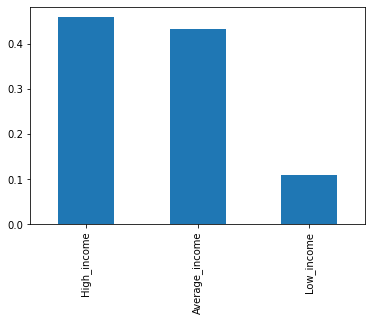

In [415]:
#income/mean prices
bar1 = df_clean['Income_flag'].value_counts('mean_prices_customers').plot.bar()

In [87]:
bar1.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'income_flag_vs_prices.jpg'))

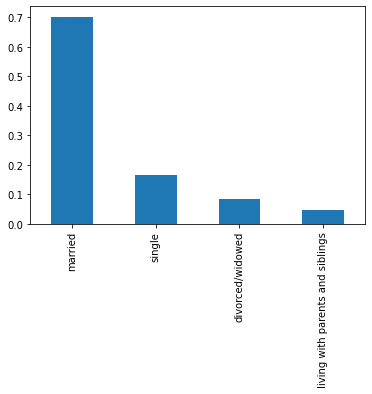

In [89]:
#family status/prices
bar2 = df_clean['Family_status'].value_counts('prices').plot.bar()

In [116]:
bar2.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'family_status_vs_prices.png'),bbox_inches='tight')

In [27]:
#setting a random seed to spit the dataset for quicker line chart processing
np.random.seed(4)
dev = np.random.rand(len(df_clean)) <= 0.7

In [28]:
#smaller dataframe for line charts
small = df_clean[~dev]

In [29]:
df_2 = small[['orders_day_of_week','prices']]

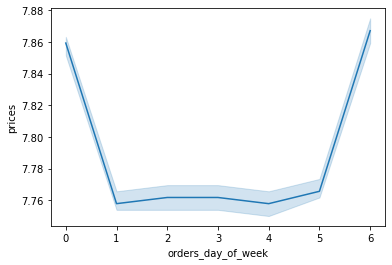

In [99]:
orders by day/ prices
line_plot1 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [102]:
df_3 = small[['order_hour_of_day','prices']]

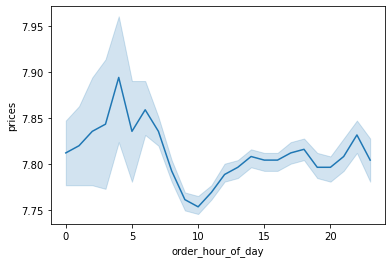

In [103]:
orders by hour/prices
line_plot2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [109]:
line_plot2.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'prices_vs_hour.png'))

In [106]:
df_4 = small[['order_hour_of_day', 'mean_prices_customers']]

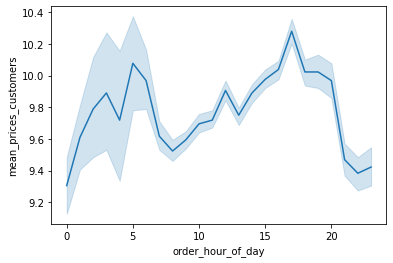

In [107]:
#orders by hour/mean prices
line_plot3 = sns.lineplot(data = df_4, x = 'order_hour_of_day', y = 'mean_prices_customers')

In [115]:
line_plot3.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'mean_prices_vs_hour.png'), bbox_inches = 'tight')

In [110]:
df_5 = small[['orders_day_of_week','mean_prices_customers']]

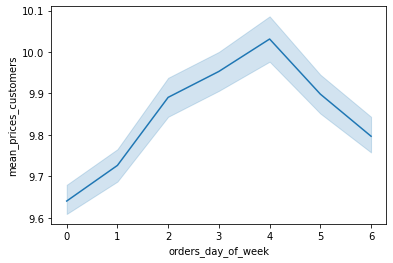

In [113]:
#orders by day/mean prices
line_plot4 = sns.lineplot(data = df_5, x = 'orders_day_of_week', y = 'mean_prices_customers')

In [117]:
line_plot4.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'mean_prices_vs_day.png'), bbox_inches = 'tight')

In [58]:
df_6 = small[['age_group','mean_prices_customers']]

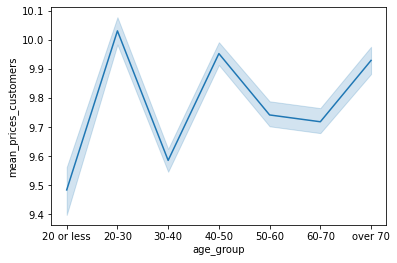

In [59]:
#age group/mean prices
line_plot5 = sns.lineplot(data = df_6, x = 'age_group', y = 'mean_prices_customers')


In [32]:
line_plot5.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'mean_prices_vs_age.png'), bbox_inches = 'tight')

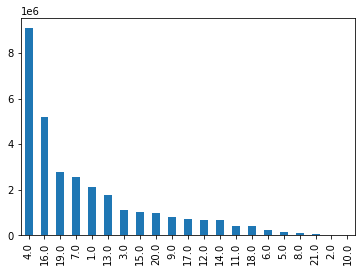

In [46]:
#orders by department
bar_dep = df_clean['department_id'].value_counts().plot.bar()

In [119]:
bar_dep.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'most_popular_depts.png'))

Percentage of orders by department:

In [161]:
#import the department dataset

df_dep = pd.read_csv(os.path.join(path, '02data', 'prepared_data', 'departments_wrangled.csv'))

In [162]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [226]:
#fix column names
df_dep_clean = df_dep.rename (columns = {'Unnamed: 0': 'department_id', 'department':'category'})

In [169]:
#create a new dataframe only with department information
department = df_clean['department_id']

In [173]:
department_values = department.value_counts()

In [193]:
df_dep_val = department_values.to_frame().reset_index()

In [217]:
df_dep_val.head(3)

,index,department_id
0,4.0,9079276
1,16.0,5191828
2,19.0,2766406


In [199]:
#fix the column names
df_dep_val_clean =df_dep_val.rename(columns = {'index': 'department_id','department_id':'counts'})

In [216]:
df_dep_val_clean.head(3)

,department_id,counts,percentage
0,4.0,9079276,29.294920
1,16.0,5191828,16.751796
2,19.0,2766406,8.926003


In [201]:
#calculate the percentage
percentage = (df_dep_val_clean['counts'] / df_dep_val_clean['counts'].sum())*100

In [202]:
#add the percentage to the dataframe
df_dep_val_clean['percentage'] = percentage

In [215]:
df_dep_val_clean

,department_id,counts,percentage
0,4.0,9079276,29.294920
1,16.0,5191828,16.751796
2,19.0,2766406,8.926003
3,7.0,2571934,8.298525
4,1.0,2123342,6.851112
5,13.0,1782903,5.752661
6,3.0,1125026,3.629975
7,15.0,1012074,3.265528
8,20.0,1003834,3.238941
9,9.0,822136,2.652679


In [221]:
#show 'percentage' as %
pd.options.display.float_format = '{:.2f}%'.format
df_dep_val_clean

,department_id,counts,percentage
0,4.00%,9079276,29.29%
1,16.00%,5191828,16.75%
2,19.00%,2766406,8.93%
3,7.00%,2571934,8.30%
4,1.00%,2123342,6.85%
5,13.00%,1782903,5.75%
6,3.00%,1125026,3.63%
7,15.00%,1012074,3.27%
8,20.00%,1003834,3.24%
9,9.00%,822136,2.65%


In [223]:
df_dep_val_clean.head()

,department_id,counts,percentage
0,4.00%,9079276,29.29%
1,16.00%,5191828,16.75%
2,19.00%,2766406,8.93%
3,7.00%,2571934,8.30%
4,1.00%,2123342,6.85%


In [227]:
#merge with department dataframe
dep_merged = df_dep_val_clean.merge(df_dep_clean, on = 'department_id', indicator = True)

In [234]:
dep_merged.drop(columns = '_merge', inplace = True)

In [235]:
dep_merged.head()

,department_id,counts,percentage,category
0,4.00%,9079276,29.29%,produce
1,16.00%,5191828,16.75%,dairy eggs
2,19.00%,2766406,8.93%,snacks
3,7.00%,2571934,8.30%,beverages
4,1.00%,2123342,6.85%,frozen


In [251]:
#export the merged department dataset
dep_merged.to_csv(os.path.join(path, '02data','prepared_data', 'departments_merged.csv'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'breakfast'),
  Text(12, 0, 'meat seafood'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

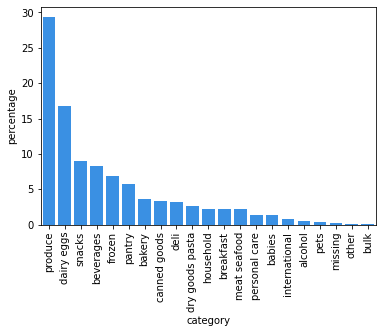

In [249]:
#plot the department percentage
dep_bar = sns.barplot(data = dep_merged, x = 'category', y = 'percentage', color = 'dodgerblue')
plt.xticks(rotation=90)

In [250]:
dep_bar.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_departments_perc.png'),bbox_inches = 'tight')

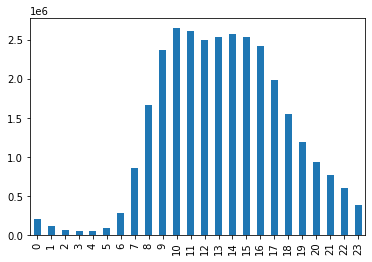

In [121]:
#orders by hour
bar_ords_hour = df_clean['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [122]:
bar_ords_hour.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_orders_hour.png'),bbox_inches = 'tight')

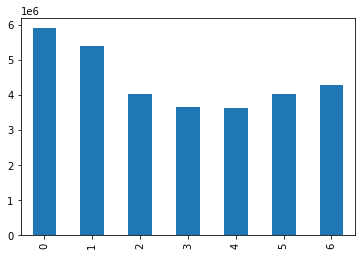

In [47]:
#orders by day
bar_ords_day = df_clean['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [101]:
bar_ords_day.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_orders_day.png'),bbox_inches = 'tight')

In [48]:
#set color palettes
price_flag_c = 'tab20b'
loyalty_flag_c = 'Set1'
region_c = 'viridis'
family_c = 'Dark2'
age_c = 'jet'

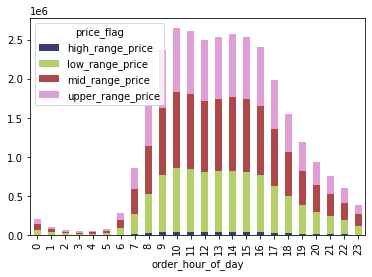

In [17]:
#orders by hour/price range
bar_price_hour = crosstab_price_hour.T.plot(kind = 'bar', stacked = True, colormap = price_flag_c)

In [18]:
bar_price_hour.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_price_hour.png'),bbox_inches = 'tight')

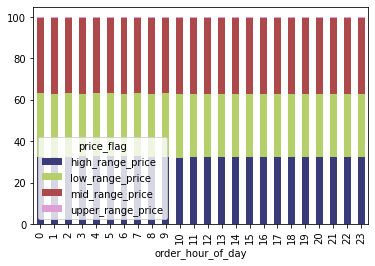

In [295]:
#100% stacked orders by hour/price range
stacked_price_hour = crosstab_price_hour.T.apply(lambda x: x*100/sum(x), axis = 1)
bar_stacked_price_hour = stacked_price_hour.plot (kind = 'bar', stacked = True, colormap = price_flag_c )

In [298]:
bar_stacked_price_hour.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'stacked_price_hour.png'),bbox_inches = 'tight')

In [102]:
bar_price_hour.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_price_hour.png'),bbox_inches = 'tight')

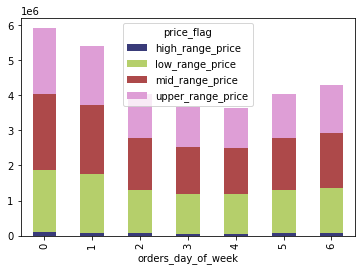

In [19]:
#orders by day/price range
bar_price_day = crosstab_price_day.T.plot(kind = 'bar', stacked = True, colormap = price_flag_c)

In [20]:
bar_price_day.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_price_day.png'),bbox_inches = 'tight')

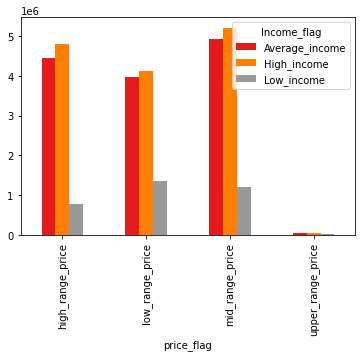

In [323]:
#price range/income
bar_price_income = crosstab_price_income.plot(kind = 'bar', stacked = False, colormap = loyalty_flag_c)

In [406]:
stacked_price_income = crosstab_price_income.apply(lambda x: x*100/sum(x), axis = 1)

In [407]:
stacked_price_income

Income_flag,Average_income,High_income,Low_income
price_flag,,,
high_range_price,44.37%,47.85%,7.78%
low_range_price,41.93%,43.69%,14.38%
mid_range_price,43.38%,45.97%,10.65%
upper_range_price,42.85%,46.36%,10.79%


In [324]:
bar_price_income.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_price_income.png'),bbox_inches = 'tight')

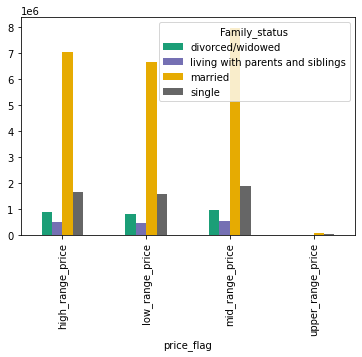

In [401]:
#price/family status
bar_price_family_status = crosstab_price_family.plot(kind = 'bar', stacked = False, colormap = 'Dark2')

In [403]:
stacked_price_family_Status = crosstab_price_family.T.apply(lambda x: x*100/sum(x), axis = 1)

In [404]:
stacked_price_family_Status

price_flag,high_range_price,low_range_price,mid_range_price,upper_range_price
Family_status,,,,
divorced/widowed,32.55%,30.57%,36.49%,0.39%
living with parents and siblings,32.57%,30.48%,36.55%,0.40%
married,32.41%,30.54%,36.65%,0.39%
single,32.40%,30.57%,36.65%,0.39%


In [405]:
stacked_price_family_Status.to_clipboard()

In [375]:
bar_price_family_status.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_price_family.png'),bbox_inches = 'tight')

In [125]:
#loyalty/frequency
crosstab_loyalty_frequency = pd.crosstab(df_clean['loyalty_flag'], df_clean['days_frequency'], dropna = False)
crosstab_loyalty_frequency

days_frequency,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,23133,124427,479810,1260649,1875005,1783754,1819467,2490096,356286,58296,...,0,0,0,0,0,0,0,0,0,0
New customer,2964,7943,16535,40354,70924,97286,156195,345876,232861,175641,...,179087,114203,96635,84578,78652,89471,97762,124835,86071,1028389
Regular customer,1512,14379,59554,174618,370706,605264,1002232,2816897,2106980,1394431,...,212839,132911,90958,73742,62813,59711,59380,56717,36198,121189


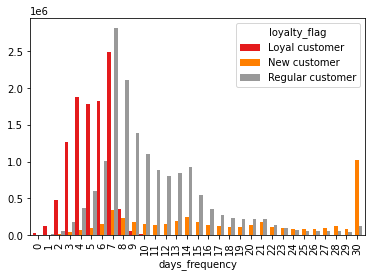

In [303]:
#loyyalty/days since last orderb
bar_loyalty_orders = crosstab_loyalty_frequency.T.plot(kind = 'bar', stacked = False, width = 1, colormap = loyalty_flag_c)

_Suspicious high number of orders from new customers at 30 days. I suspect that the original dataset has been altered (for the sake of this exercise) by marking orders made more than 30 days apart as simply "30"._

In [304]:
bar_loyalty_orders.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_loyalty_freq.png'),bbox_inches = 'tight')

In [152]:
#loyalty/department
crosstab_loyalty_department = pd.crosstab(df_clean['loyalty_flag'], df_clean['department_id'], dropna = False)

In [153]:
crosstab_loyalty_department.T

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1.0,609460,372272,1140000
2.0,10715,5839,17857
3.0,379873,172104,568851
4.0,3147376,1336607,4595293
5.0,38726,28647,77301
6.0,78394,43841,133756
7.0,855017,396649,1320235
8.0,25469,15880,51711
9.0,242580,144836,434720


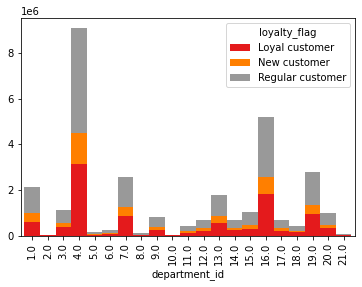

In [305]:
#department orders/loyalty
bar_loyalty_department = crosstab_loyalty_department.T.plot(kind = 'bar', stacked = True, width = 1, 
                                                            colormap = loyalty_flag_c)

In [306]:
bar_loyalty_department.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_loyalty_dep.png'),bbox_inches = 'tight')

In [45]:
#loyalty/region
crosstab_loyalty_region = pd.crosstab(df_clean['loyalty_flag'], df_clean['Region'], dropna = False)

In [158]:
crosstab_loyalty_region 

Region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373854,1841833,3205520,2863189
New customer,1136805,842195,1501034,1323867
Regular customer,3751105,2780851,4995604,4349835


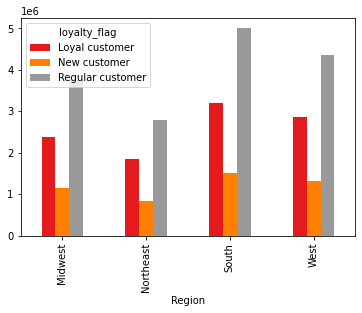

In [50]:
bar_loyalty_region = crosstab_loyalty_region.T.plot(kind = 'bar', stacked = False, width = 0.5, colormap = 'Set1')

In [308]:
bar_loyalty_region.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_loyalty_region.png'),bbox_inches = 'tight')

In [221]:
#department/region
crosstab_department_region = pd.crosstab(df_clean['department_id'], df_clean['Region'], dropna = False)

In [220]:
crosstab_department_region.to_clipboard()

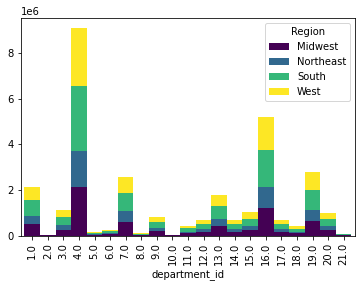

In [319]:
bar_department_region = crosstab_department_region.plot(kind = 'bar', stacked = True, width = 1, colormap = 'viridis')

In [374]:
bar_department_region.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_departmnet_region.png'),bbox_inches = 'tight')

In [183]:
#age/family
crosstab_age_family = pd.crosstab(df_clean['age_group'], df_clean['Family_status'], dropna = False)
crosstab_age_family

Family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
20-30,0,731492,2888941,1222851
30-40,0,0,3634662,1212977
40-50,0,0,3669560,1213803
50-60,0,0,3621822,1220163
60-70,1204514,0,3557277,0
<20,0,749716,0,224851
over 70,1440858,0,4372205,0


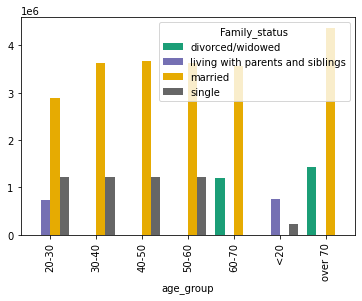

In [365]:
bar_age_family = crosstab_age_family.plot(kind = 'bar', stacked = False, width = 0.8, colormap = family_c)

In [366]:
bar_age_family.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_age_family.png'),bbox_inches = 'tight')

In [223]:
#family/region
crosstab_family_region = pd.crosstab(df_clean['Family_status'], df_clean['Region'], dropna = False)

In [225]:
crosstab_family_region

Region,Midwest,Northeast,South,West
Family_status,,,,
divorced/widowed,617223,478786,817228,732135
living with parents and siblings,351447,256433,481482,391846
married,5087426,3853896,6803810,5999335
single,1205668,875764,1599638,1413575


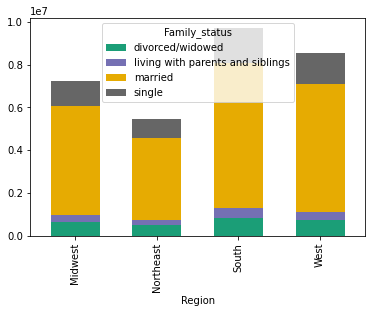

In [368]:
bar_fam_region = crosstab_family_region.T.plot(kind = 'bar', stacked = True, width = 0.6, colormap = family_c)

In [373]:
bar_fam_region.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_family_region.png'),bbox_inches = 'tight')

In [230]:
#family/department
crosstab_family_department = pd.crosstab(df_clean['Family_status'], df_clean['department_id'], dropna = False)

In [231]:
crosstab_family_department

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Family_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,183957,2842,95735,777095,11878,21814,220879,8025,70251,2676,...,57621,151891,56670,84268,442602,58446,34351,236244,86749,5064
living with parents and siblings,102993,1815,53684,430539,8380,12394,119107,5338,39542,1633,...,32344,85845,33233,48477,250207,33349,19381,131310,48119,3317
married,1489391,23882,785749,6373295,99442,179136,1807453,64120,578298,23818,...,476559,1252956,471919,712577,3632600,495151,287683,1944658,702333,45516
single,345391,5872,185660,1498347,24974,42647,424462,15577,134045,5324,...,108257,292013,110050,166752,851774,112912,68977,454194,166633,10871


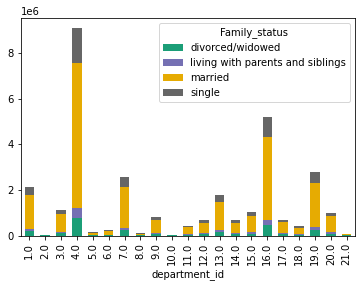

In [370]:
bar_fam_dep = crosstab_family_department.T.plot(kind = 'bar', stacked = True, width = 0.6, colormap = family_c)

In [372]:
bar_fam_dep.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_family_department.png'),bbox_inches = 'tight')

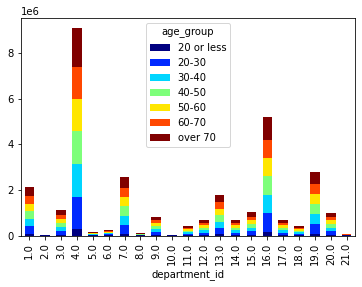

In [79]:
bar_age_dep = crosstab_age.T.plot(kind = 'bar', stacked = True, width = 0.6, colormap = age_c)

In [82]:
bar_age_dep.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_age_department.png'),bbox_inches = 'tight')

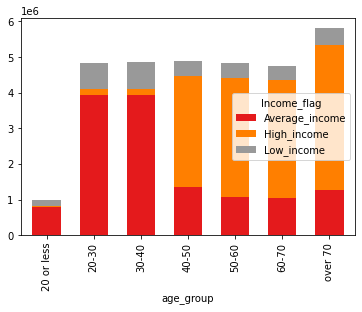

In [92]:
bar_age_income = crosstab_age_income.plot(kind = 'bar', stacked = True, width = 0.6, colormap = loyalty_flag_c)

In [93]:
bar_age_income.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_age_income.png'),bbox_inches = 'tight')

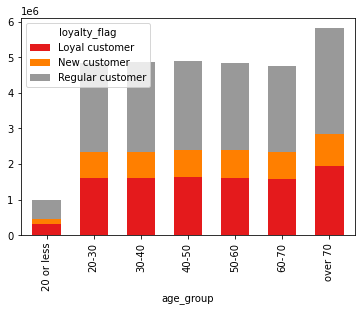

In [66]:
bar_age_loyalty = crosstab_age_loyalty.plot(kind = 'bar', stacked = True, width = 0.6, colormap = loyalty_flag_c)

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [114]:
agg_prices = df_clean.groupby('user_id').agg({'prices': ['mean', 'min', 'max']})

In [115]:
agg_prices.head()

prices                     
             mean       min        max
user_id                               
1        6.367188  1.000000  14.000000
2        7.515625  1.299805  14.796875
3        8.195312  1.299805  14.398438
4        8.203125  1.400391  14.601562
7        7.464844  1.099609  23.203125

In [116]:
#fixing the column names
agg_prices.reset_index()
header_names = ('mean_price', 'min_price', 'max_price')
agg_prices.columns = header_names

In [117]:
agg_prices.head()

,mean_price,min_price,max_price
user_id,,,
1,6.367188,1.000000,14.000000
2,7.515625,1.299805,14.796875
3,8.195312,1.299805,14.398438
4,8.203125,1.400391,14.601562
7,7.464844,1.099609,23.203125


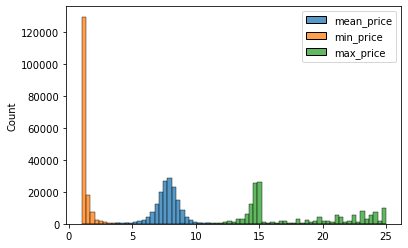

In [118]:
hist_sns = sns.histplot(data = agg_prices)

In [119]:
agg_prices.to_csv((os.path.join(path, '02data','prepared_data', 'aggregated_prices.csv')))

In [99]:
agg_days = df_clean.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [101]:
agg_days.head()

days_since_prior_order           
                          mean  min   max
user_id                                  
1                    20.265625  0.0  30.0
2                    15.968750  3.0  30.0
3                    11.484375  7.0  21.0
4                    15.359375  0.0  21.0
7                    13.546875  2.0  30.0

In [102]:
#fixing the column names
agg_days.reset_index()
header_names = ('mean_interval', 'min_interval', 'max_interval')
agg_days.columns = header_names

In [103]:
agg_days.head()

,mean_interval,min_interval,max_interval
user_id,,,
1,20.265625,0.0,30.0
2,15.968750,3.0,30.0
3,11.484375,7.0,21.0
4,15.359375,0.0,21.0
7,13.546875,2.0,30.0


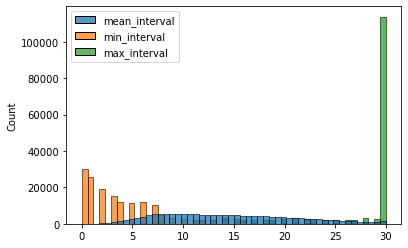

In [104]:
hist_interval = sns.histplot (data = agg_days)

In [105]:
''''the 30 days interval spike is probably an artifact due to how the dataset has been edited for this exercise. 
I'll drop all the entries with this value, because is compressing the rest of the bars to much'''
agg_days_clean = agg_days[agg_days['max_interval'] < 30]

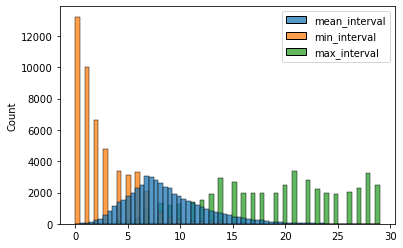

In [113]:
hist_interval2 = sns.histplot (data = agg_days_clean)

In [111]:
#export the dataframe
agg_days_clean.to_csv((os.path.join(path, '02data','prepared_data', 'aggregated_days_interval.csv')))

In [147]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30994611 entries, 0 to 32436240
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               category
 9   product_name            object  
 10  aisle_id                float16 
 11  department_id           float16 
 12  prices                  float16 
 13  busiest_day             category
 14  Busiest days            category
 15  busiest_period_of_day   category
 16  max_order               int8    
 17  loyalty_flag            category
 18  mean_prices_customers   float16 
 19  spending_flag           category
 20  days_frequency          int8    
 21  freque

In [269]:
agg_hours = df_clean.groupby('user_id').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [267]:
agg_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162633 entries, 1 to 206209
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   (order_hour_of_day, mean)  162633 non-null  float64
 1   (order_hour_of_day, min)   162633 non-null  int8   
 2   (order_hour_of_day, max)   162633 non-null  int8   
dtypes: float64(1), int8(2)
memory usage: 2.8 MB


In [271]:
agg_hours.reset_index()
header_names = ('mean_hour', 'min_hour', 'max_hour')
agg_hours.columns = header_names

In [272]:
agg_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162633 entries, 1 to 206209
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mean_hour  162633 non-null  float64
 1   min_hour   162633 non-null  int8   
 2   max_hour   162633 non-null  int8   
dtypes: float64(1), int8(2)
memory usage: 2.8 MB


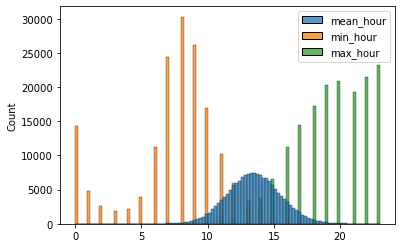

In [273]:
hist_hour = sns.histplot (data = agg_hours)

In [284]:
agg_day = df_clean.groupby('user_id').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [285]:
agg_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162633 entries, 1 to 206209
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   (orders_day_of_week, mean)  162633 non-null  float64
 1   (orders_day_of_week, min)   162633 non-null  int8   
 2   (orders_day_of_week, max)   162633 non-null  int8   
dtypes: float64(1), int8(2)
memory usage: 2.8 MB


In [289]:
agg_day.reset_index()
header_names = ('mean_day', 'min_day', 'max_day')
agg_day.columns = header_names

In [290]:
agg_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162633 entries, 1 to 206209
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   mean_day  162633 non-null  float64
 1   min_day   162633 non-null  int8   
 2   max_day   162633 non-null  int8   
dtypes: float64(1), int8(2)
memory usage: 2.8 MB


In [320]:
agg_day.head()

,mean_day,min_day,max_day
user_id,,,
1,2.64,1,4
2,2.01,1,5
3,1.01,0,3
4,4.72,4,6
7,1.73,0,6


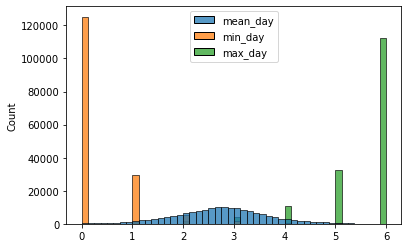

In [293]:
hist_age_hour = sns.histplot (data = agg_day)

### 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important. 

In [377]:
#family status/region
crosstab_family_region = pd.crosstab(df_clean['Family_status'], df_clean['Region'], dropna = False)

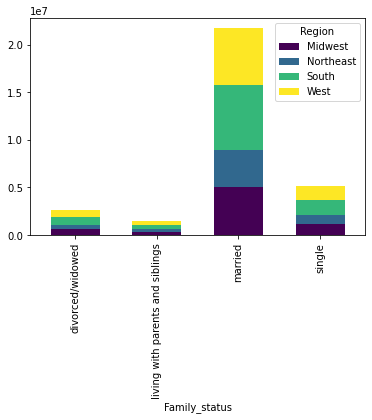

In [382]:
bar_family_region = crosstab_family_region.plot(kind = 'bar', stacked = True, width = 0.6, colormap = region_c)

In [408]:
bar_family_region.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bar_family_region.png'),bbox_inches = 'tight')

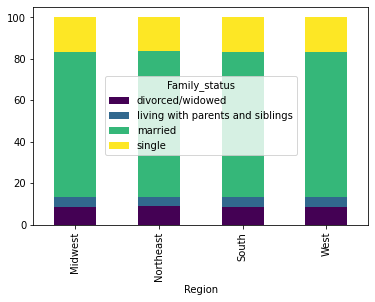

In [390]:
stacked_family_region = crosstab_family_region.T.apply(lambda x: x*100/sum(x), axis = 1)
bar_stacked_family_region = stacked_family_region.plot (kind = 'bar', stacked = True, colormap = region_c)

In [391]:
bar_stacked_family_region.figure.savefig(os.path.join(path, '04analysis','Visualizations', 'bastacked_family_region.png'),bbox_inches = 'tight')

In [393]:
stacked_family_region.to_clipboard()

In [399]:
#show family status by region as %
pd.options.display.float_format = '{:.2f}%'.format
stacked_family_region


Family_status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
Midwest,8.50%,4.84%,70.06%,16.60%
Northeast,8.76%,4.69%,70.52%,16.03%
South,8.42%,4.96%,70.13%,16.49%
West,8.58%,4.59%,70.28%,16.56%
